# Plot example dissimilarity matrices for semantic analysis

In [1]:
import os
from pathlib import Path
import numpy as np
import scipy.spatial.distance as sd
from sklearn.decomposition import FastICA
from sklearn import manifold
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from mindstorm import dsmplot
from bender_study import task
from bender_study import rsa

bids_dir = Path(os.environ['BENDER_BIDS'])
res_dir = Path(os.environ['BENDER_RESULTS'])
fig_dir = Path(os.environ['BENDER_FIGURES']) / 'semantics'

model_file = res_dir / 'batch' / 'semantics' / 'wiki_w2v.npz'

## Sample patterns for schematic

In [2]:
groups = pd.DataFrame(
    {
        'A': ['Julia Roberts', 'Barack Obama', 'Yosemite', 'Eiffel Tower'],
        'B': ['apple', 'umbrella', 'tea kettle', 'leaf'],
        'C': ['scissors', 'cup', 'butterfly', 'picnic basket'],
    }, index=[1, 2, 3, 4]
)
groups

,A,B,C
1,Julia Roberts,apple,scissors
2,Barack Obama,umbrella,cup
3,Yosemite,tea kettle,butterfly
4,Eiffel Tower,leaf,picnic basket


In [3]:
model = np.load(model_file)
ica = FastICA(n_components=5, random_state=42)
simple = {
    'items': model['items'].copy(),
    'vectors': np.clip(stats.zscore(ica.fit_transform(model['vectors']), axis=0), -1, 1),
}

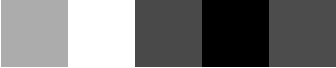

In [4]:
dsmplot.plot_pattern(rsa.get_item_vectors(groups.at[1, 'A'], simple));
plt.savefig(fig_dir / 'pattern_a1.png', pad_inches=0)

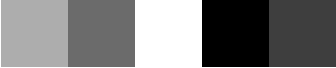

In [5]:
dsmplot.plot_pattern(rsa.get_item_vectors(groups.at[1, 'B'], simple));
plt.savefig(fig_dir / 'pattern_b1.png', pad_inches=0)

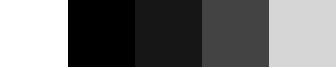

In [6]:
dsmplot.plot_pattern(rsa.get_item_vectors(groups.at[1, 'C'], simple));
plt.savefig(fig_dir / 'pattern_c1.png', pad_inches=0)

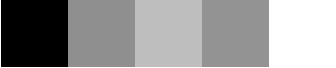

In [7]:
dsmplot.plot_pattern(rsa.get_item_vectors(groups.at[3, 'A'], simple));
plt.savefig(fig_dir / 'pattern_a2.png', pad_inches=0)

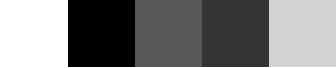

In [8]:
dsmplot.plot_pattern(rsa.get_item_vectors(groups.at[3, 'B'], simple));
plt.savefig(fig_dir / 'pattern_b2.png', pad_inches=0)

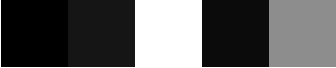

In [9]:
dsmplot.plot_pattern(rsa.get_item_vectors(groups.at[3, 'C'], simple));
plt.savefig(fig_dir / 'pattern_c2.png', pad_inches=0)

## Sample items and model for one participant

In [10]:
df = (
    task.load_merged_study_events(bids_dir / 'rawdata', '02')
    .sort_values('group')
    .query('pair_type == "BC"')
)

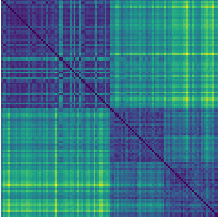

In [11]:
fig, ax = plt.subplots()
ax.matshow(
    sd.squareform(
        sd.pdist(rsa.get_item_vectors(df['item1'].to_list(), model), 'correlation')
    )
)
ax.set_axis_off()
fig.savefig(fig_dir / 'rdm_a.png', pad_inches=0)

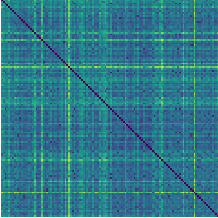

In [12]:
fig, ax = plt.subplots()
ax.matshow(
    sd.squareform(
        sd.pdist(rsa.get_item_vectors(df['item2'].to_list(), model), 'correlation')
    )
)
ax.set_axis_off()
fig.savefig(fig_dir / 'rdm_b.png', pad_inches=0)

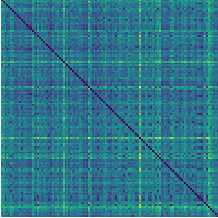

In [13]:
fig, ax = plt.subplots()
ax.matshow(
    sd.squareform(
        sd.pdist(rsa.get_item_vectors(df['item3'].to_list(), model), 'correlation')
    )
)
ax.set_axis_off()
fig.savefig(fig_dir / 'rdm_c.png', pad_inches=0)

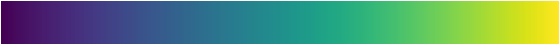

In [14]:
a = np.tile(np.arange(1024), (80, 1))
fig, ax = plt.subplots(figsize=(10, 1))
ax.matshow(a)
ax.set_axis_off()
fig.savefig(fig_dir / 'colorbar.png', pad_inches=0)

In [15]:
pool = pd.read_csv(bids_dir / 'stimuli' / 'stimuli.csv')
pool_images = task.read_images(pool, bids_dir / 'stimuli' / 'main_180')

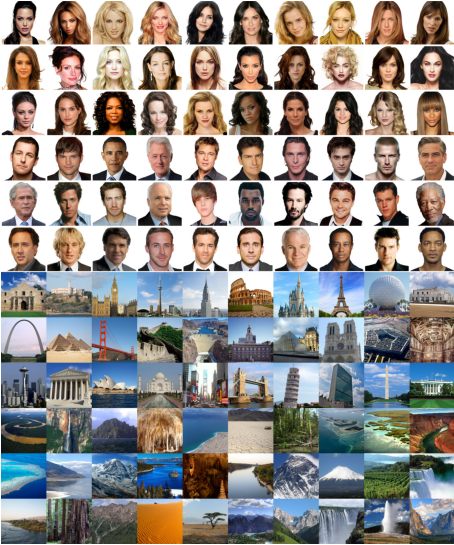

In [16]:
mat = dsmplot.image_matrix(
    [pool_images[item] for item in df['item1']], (12, 10)
)
fig, ax = plt.subplots(figsize=(12, 10))
ax.imshow(mat)
ax.set_axis_off()
fig.savefig(fig_dir / 'images_a.png', pad_inches=0)

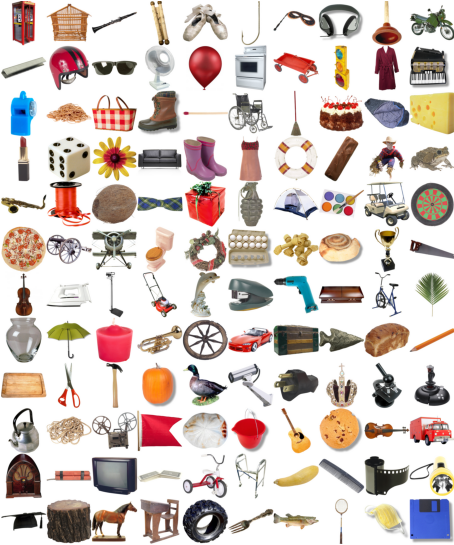

In [17]:
mat = dsmplot.image_matrix(
    [pool_images[item] for item in df['item2']], (12, 10)
)
fig, ax = plt.subplots(figsize=(12, 10))
ax.imshow(mat)
ax.set_axis_off()
fig.savefig(fig_dir / 'images_b.png', pad_inches=0)

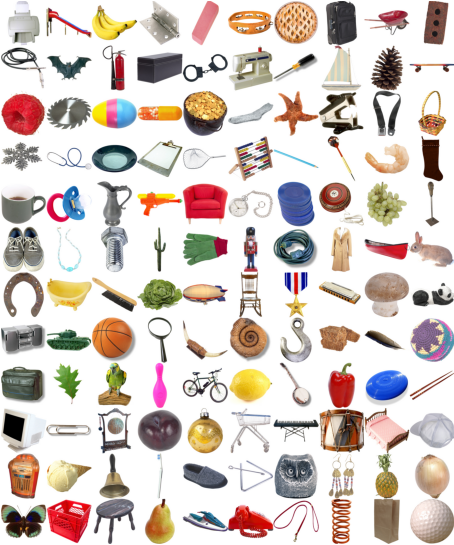

In [18]:
mat = dsmplot.image_matrix(
    [pool_images[item] for item in df['item3']], (12, 10)
)
fig, ax = plt.subplots(figsize=(12, 10))
ax.imshow(mat)
ax.set_axis_off()
fig.savefig(fig_dir / 'images_c.png', pad_inches=0)

## Multidimensional scaling plots to illustrate semantic model

In [19]:
alpha_images = task.read_images(pool, bids_dir / 'stimuli' / 'main_180_alpha')

In [20]:
mds_embedding = manifold.MDS(
    n_components=2, random_state=42, dissimilarity='precomputed'
)

In [21]:
tsne_embedding = manifold.TSNE(
    n_components=2, 
    perplexity=6,
    learning_rate='auto',
    init='pca',
    n_iter=5000, 
    n_iter_without_progress=500,
)

In [22]:
pool_subset = pool.query('category == "face"')
vectors = rsa.get_item_vectors(pool_subset['stim'], model)
dsm = sd.squareform(sd.pdist(vectors, 'correlation'))
images_subset = [alpha_images[item] for item in pool_subset['stim']]

/Users/morton/.local/share/virtualenvs/bender_study/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


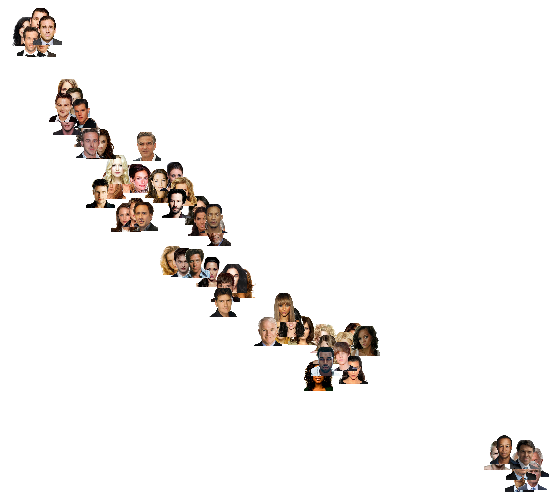

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
dsmplot.plot_mds(
    dsm, images_subset, zoom=0.1, ax=ax, embedding=tsne_embedding
);
ax.set_axis_off()
ax.set_aspect('equal')
fig.savefig(fig_dir / 'embedding_person_tsne.png', dpi=300)

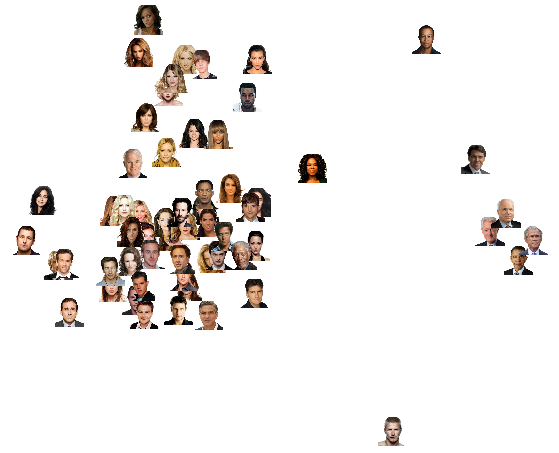

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
dsmplot.plot_mds(
    dsm, images_subset, zoom=0.1, ax=ax, embedding=mds_embedding
);
ax.set_axis_off()
ax.set_aspect('equal')
fig.savefig(fig_dir / 'embedding_person_mds.png', dpi=300)

In [25]:
pool_subset = pool.query('category == "scene"')
vectors = rsa.get_item_vectors(pool_subset['stim'], model)
dsm = sd.squareform(sd.pdist(vectors, 'correlation'))
images_subset = [alpha_images[item] for item in pool_subset['stim']]

/Users/morton/.local/share/virtualenvs/bender_study/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


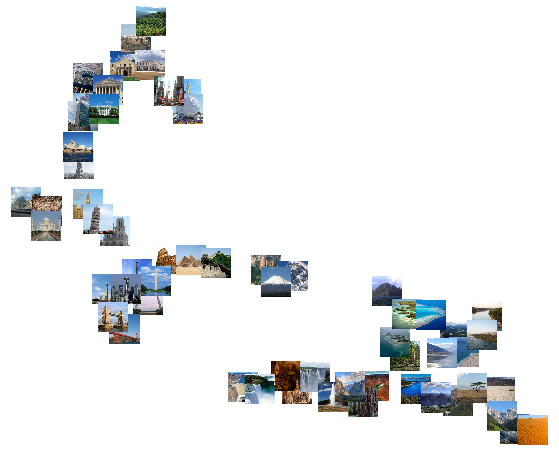

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))
dsmplot.plot_mds(
    dsm, images_subset, zoom=0.1, ax=ax, embedding=tsne_embedding
);
ax.set_axis_off()
ax.set_aspect('equal')
fig.savefig(fig_dir / 'embedding_place_tsne.png', dpi=300)

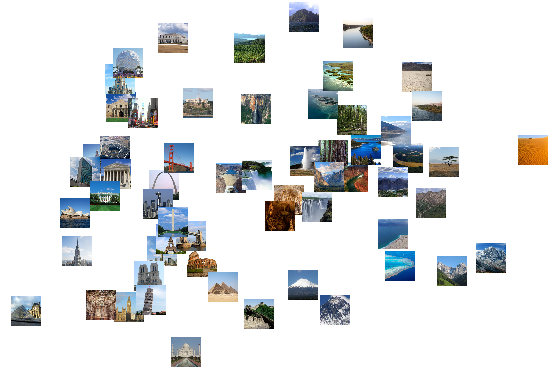

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
dsmplot.plot_mds(
    dsm, images_subset, zoom=0.1, ax=ax, embedding=mds_embedding
);
ax.set_axis_off()
ax.set_aspect('equal')
fig.savefig(fig_dir / 'embedding_place_mds.png', dpi=300)

In [28]:
pool_subset = pool.query('category == "object"')
vectors = rsa.get_item_vectors(pool_subset['stim'], model)
dsm = sd.squareform(sd.pdist(vectors, 'correlation'))
images_subset = [alpha_images[item] for item in pool_subset['stim']]

/Users/morton/.local/share/virtualenvs/bender_study/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


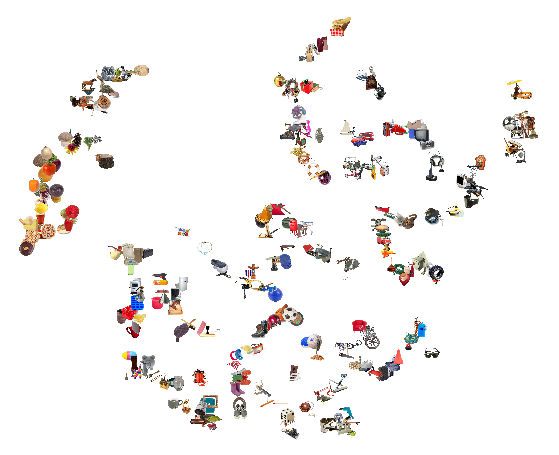

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))
dsmplot.plot_mds(
    dsm, images_subset, zoom=0.05, ax=ax, embedding=tsne_embedding
);
ax.set_axis_off()
ax.set_aspect('equal')
fig.savefig(fig_dir / 'embedding_object_tsne.png', dpi=300)

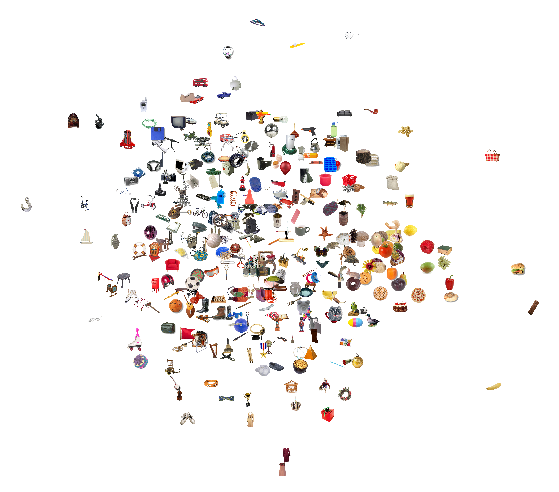

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
dsmplot.plot_mds(
    dsm, images_subset, zoom=0.05, ax=ax, embedding=mds_embedding
);
ax.set_axis_off()
ax.set_aspect('equal')
fig.savefig(fig_dir / 'embedding_object_mds.png', dpi=300)

In [31]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 8.3.0

bender_study: 0.1.0
matplotlib  : 3.5.1
mindstorm   : 0.9.0
scipy       : 1.8.0
pandas      : 1.4.3
numpy       : 1.22.3
sklearn     : 1.0.2

